### Title: Unveiling Travel Patterns: Predicting Visitor Arrivals with Machine Learning

The tourism industry is a significant driver of economic growth, contributing to employment, foreign exchange, and business opportunities. However, accurately predicting visitor arrivals remains a challenge due to complex patterns across demographics, years, and external factors.

### Data From data.gov.my
Malaysia's official open data portal

### Feature
- Total visitor arrivals,
- Male-specific and female-specific arrivals
- Temporal trends (years)

### Problem Statement

The goal of this project is to leverage machine learning techniques to address the following:
- Can we build accurate predictive models for visitor arrivals based on demographic and historical data?
- How do male and female visitor trends influence overall arrivals?

By uncovering patterns in visitor behavior and enabling precise forecasting, this project aims to assist tourism boards, businesses, and policymakers in planning marketing campaigns, resource allocation, and infrastructure improvements to meet tourism demands effectively.

### Literature Review
Understanding and predicting travel patterns have been a longstanding challenge in tourism research. Accurate forecasts of visitor arrivals are vital for policymakers, tourism operators, and local economies to manage resources effectively and enhance visitor experiences. Traditionally, statistical methods such as time series analysis (e.g., ARIMA) have been widely employed for visitor prediction due to their interpretability and proven effectiveness. However, these models often struggle to capture the non-linear and complex relationships inherent in travel data.

With the advent of machine learning, researchers have increasingly adopted techniques such as Random Forests, Support Vector Machines, and Neural Networks to address these limitations. These models excel in handling high-dimensional data, and non-linear patterns, and integrating diverse features such as seasonality, weather, and economic indicators. Studies have demonstrated the superior predictive performance of machine learning models over traditional approaches, particularly in contexts where large datasets are available.

Recent advancements also highlight the role of feature engineering and data visualisation in improving prediction accuracy and interpretability. Factors such as geographic trends, demographic characteristics, and external events (e.g., pandemics or policy changes) have been integrated into models to enhance their robustness.



## Libraries and Data Collection

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, classification_report
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import seaborn as sns


In [59]:
data = pd.read_csv('arrivals.csv')

In [60]:
data.head()

,date,country,arrivals,arrivals_male,arrivals_female
0,2020-01-01,ALL,2923053,1598823,1324230
1,2020-02-01,ALL,1997322,1186644,810678
2,2020-03-01,ALL,1065039,638642,426397
3,2020-04-01,ALL,15077,14086,991
4,2020-05-01,ALL,14282,13195,1087


In [61]:
data.describe()

,arrivals,arrivals_male,arrivals_female
count,1.305000e+04,1.305000e+04,1.305000e+04
mean,1.290506e+04,7.194021e+03,5.711044e+03
std,1.465386e+05,8.092340e+04,6.578004e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.400000e+01,9.000000e+00,4.000000e+00
75%,1.930000e+02,1.140000e+02,7.100000e+01
max,3.770832e+06,1.992771e+06,1.778061e+06


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13050 entries, 0 to 13049
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             13050 non-null  datetime64[ns]
 1   country          13050 non-null  object        
 2   arrivals         13050 non-null  int64         
 3   arrivals_male    13050 non-null  int64         
 4   arrivals_female  13050 non-null  int64         
 5   year             13050 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(3), object(1)
memory usage: 560.9+ KB


In [62]:
data.columns

Index(['date', 'country', 'arrivals', 'arrivals_male', 'arrivals_female'], dtype='object')

In [63]:
data_filtered = data[data['country'] == 'ALL']

# Display the filtered dataset
print(data_filtered)

          date country  arrivals  arrivals_male  arrivals_female
0   2020-01-01     ALL   2923053        1598823          1324230
1   2020-02-01     ALL   1997322        1186644           810678
2   2020-03-01     ALL   1065039         638642           426397
3   2020-04-01     ALL     15077          14086              991
4   2020-05-01     ALL     14282          13195             1087
5   2020-06-01     ALL     14400          13103             1297
6   2020-07-01     ALL     20345          17607             2738
7   2020-08-01     ALL     22229          19152             3077
8   2020-09-01     ALL     22642          19814             2828
9   2020-10-01     ALL     22749          20108             2641
10  2020-11-01     ALL     24973          22337             2636
11  2020-12-01     ALL     29897          27721             2176
12  2021-01-01     ALL     35867          33715             2152
13  2021-02-01     ALL     33309          31254             2055
14  2021-03-01     ALL   

We only want to predict the total number of arrivals for all countries at once, that is why we only chose the rows that contains "ALL" in the 'country' column

In [64]:
data['arrivals'] = pd.to_numeric(data['arrivals'], errors='coerce')

# Exclude the row where country is "ALL"
filtered_data = data[data['country'] != 'ALL']

filtered_data['date'] = pd.to_datetime(filtered_data['date'], errors='coerce')

filtered_data = filtered_data.dropna(subset=['date'])

# Filter data for the year 2024
filtered_data_2024 = filtered_data[filtered_data['date'].dt.year == 2024]

# Group by 'country' and sum the 'arrivals' for each country
country_arrivals_2024 = filtered_data_2024.groupby('country')['arrivals'].sum()

top_5_arrivals_2024 = country_arrivals_2024.sort_values(ascending=False).head(5)

# Display the top 5 countries with the highest arrivals for 2024
print(top_5_arrivals_2024)


country
SGP    15049829
IDN     3596939
CHN     3211029
THA     1962819
BRN     1435830
Name: arrivals, dtype: int64


C:\Users\syahm\AppData\Local\Temp\ipykernel_6776\1295084281.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'], errors='coerce')


In [65]:
cm = sns.light_palette('green', as_cmap = True)
data.head(48).style.background_gradient(cmap=cm)

,date,country,arrivals,arrivals_male,arrivals_female
0,2020-01-01,ALL,2923053,1598823,1324230
1,2020-02-01,ALL,1997322,1186644,810678
2,2020-03-01,ALL,1065039,638642,426397
3,2020-04-01,ALL,15077,14086,991
4,2020-05-01,ALL,14282,13195,1087
5,2020-06-01,ALL,14400,13103,1297
6,2020-07-01,ALL,20345,17607,2738
7,2020-08-01,ALL,22229,19152,3077
8,2020-09-01,ALL,22642,19814,2828
9,2020-10-01,ALL,22749,20108,2641


## Data Visualization

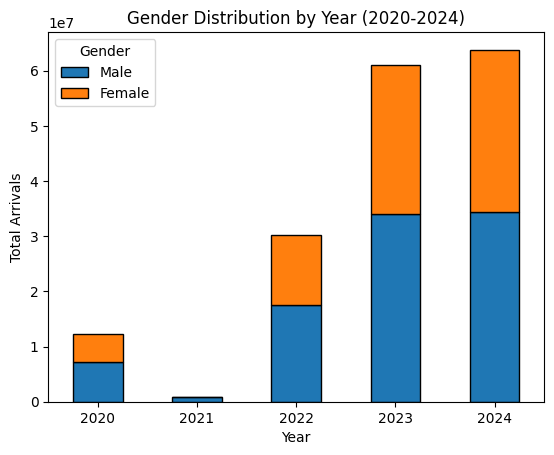

In [66]:
data['date'] = pd.to_datetime(data['date'])

data['year'] = data['date'].dt.year

# Filter the data for the years 2020 to 2024
filtered_data = data[(data['year'] >= 2020) & (data['year'] <= 2024)]

# Group by year and sum the arrivals for male and female
gender_year_counts = filtered_data.groupby('year')[['arrivals_male', 'arrivals_female']].sum()

gender_year_counts.plot(kind='bar', stacked=True, edgecolor='black')

# Adding labels and title
plt.title('Gender Distribution by Year (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Total Arrivals')
plt.xticks(rotation=0)
plt.legend(title='Gender', labels=['Male', 'Female'])

# Show the plot
plt.show()


Gender Distribution by year

- 2020: Few arrivals, with slightly more males than females.

- 2021: Very low arrivals with no major gender difference.

- 2022: Arrivals increased, with more males traveling than females, but the gap narrowed.

- 2023: A big jump in arrivals, with males leading but females increasing as well.

- 2024: Arrivals hit the highest point, with similar gender trends as 2023.


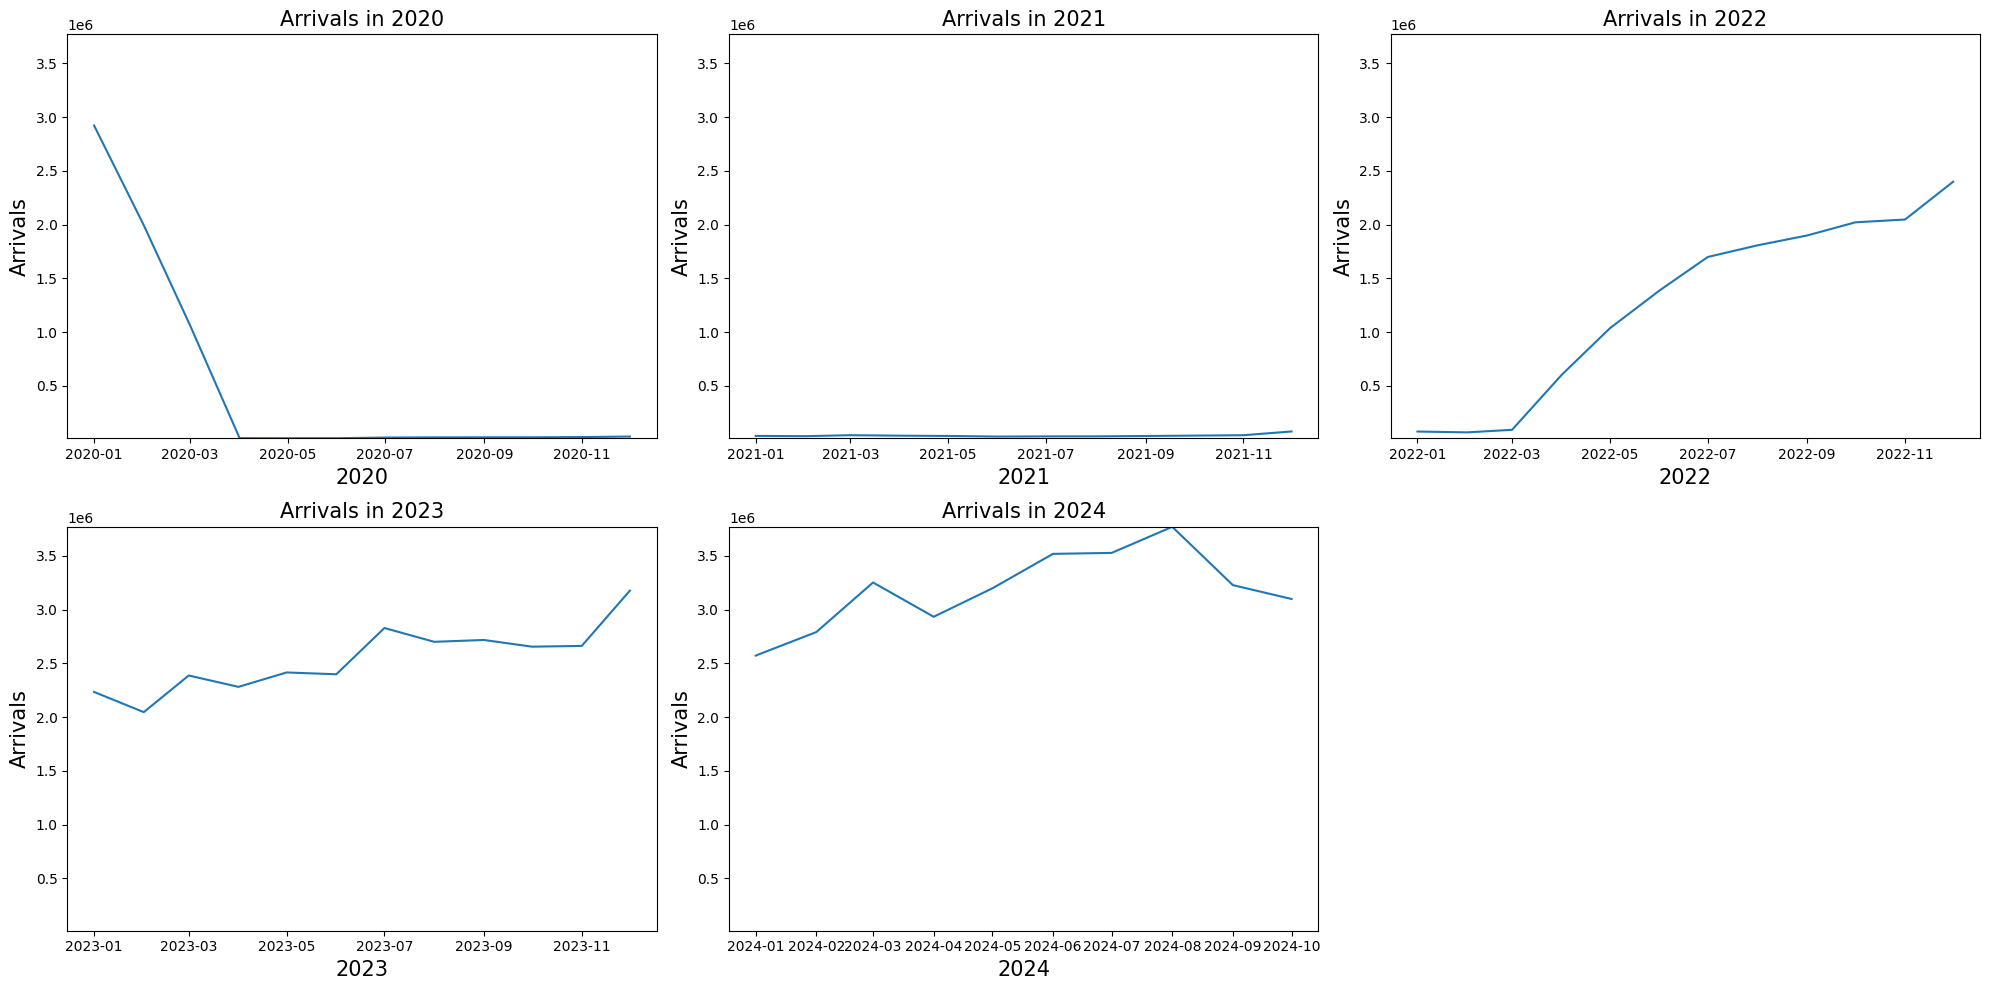

In [67]:
data['date'] = pd.to_datetime(data['date'])

# Filter data for 'All' countries
data_filtered = data[data['country'] == 'ALL']

global_min = data_filtered['arrivals'].min()
global_max = data_filtered['arrivals'].max()

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for i, year in enumerate(range(2020, 2025)):
    yearly_data = data_filtered[data_filtered['date'].dt.year == year]
    
    if not yearly_data.empty:
        axes[i].plot(yearly_data['date'], yearly_data['arrivals'])
        axes[i].set_ylim(global_min, global_max)  # Set consistent y-axis limits
        axes[i].set_xlabel(str(year), fontsize=15)
        axes[i].set_ylabel('Arrivals', fontsize=15)
        axes[i].set_title(f'Arrivals in {year}', fontsize=15)
    else:
        axes[i].text(0.5, 0.5, f"No Data for {year}", ha='center', va='center', fontsize=15)
        axes[i].set_visible(False)

for j in range(len(range(2020, 2025)), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Arrivals in 2020-2024

- 2020: Arrivals started high but dropped to almost zero by March due to COVID-19 lockdowns.

- 2021: Arrivals remained very low all year because of ongoing travel restrictions.

- 2022: Arrivals began recovering in March and increased steadily, reaching over 2.5 million by the end of the year.

- 2023: Arrivals stayed stable around 2.5 to 3 million, showing a strong recovery.

- 2024: Arrivals peaked at 3.5 million mid-year but dropped slightly towards the end, reflecting a full recovery with some ups and downs.


In [68]:
data['date'] = pd.to_datetime(data['date'])

data_filtered = data[data['country'] == 'ALL']

data_filtered['year'] = data_filtered['date'].dt.year
data_yearly = data_filtered.groupby('year').agg({'arrivals': 'sum'}).reset_index()

train_data = data_yearly[data_yearly['year'] < 2025]
future_data = pd.DataFrame({'year': [2025, 2026]})

print("Data prepared successfully.")

Data prepared successfully.


C:\Users\syahm\AppData\Local\Temp\ipykernel_6776\110721116.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['year'] = data_filtered['date'].dt.year


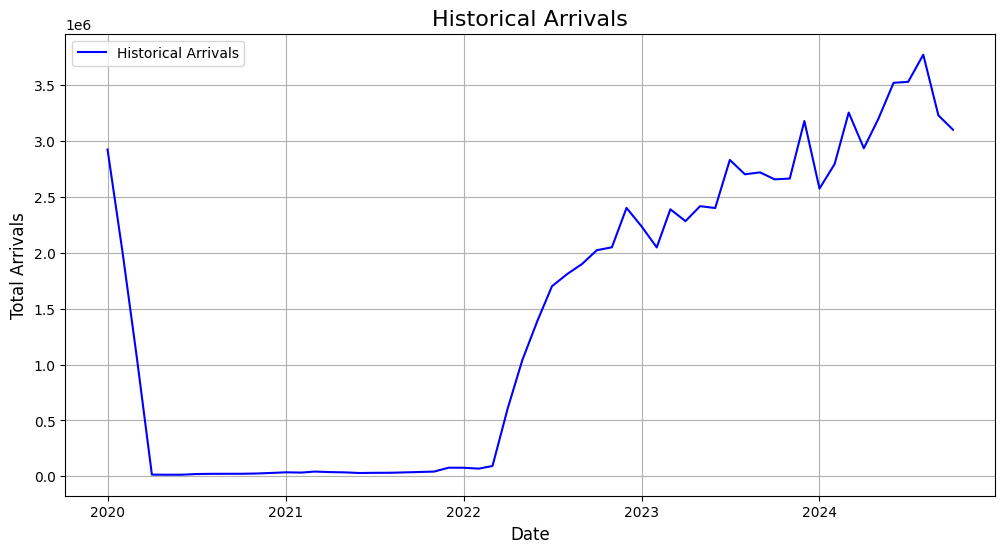

,date,country,arrivals,arrivals_male,arrivals_female,year
0,2020-01-01,ALL,2923053,1598823,1324230,2020
1,2020-02-01,ALL,1997322,1186644,810678,2020
2,2020-03-01,ALL,1065039,638642,426397,2020
3,2020-04-01,ALL,15077,14086,991,2020
4,2020-05-01,ALL,14282,13195,1087,2020


In [69]:
data['date'] = pd.to_datetime(data['date'])
all_arrivals = data[data['country'] == 'ALL']

all_arrivals = all_arrivals.sort_values(by='date')

plt.figure(figsize=(12, 6))
plt.plot(all_arrivals['date'], all_arrivals['arrivals'], label='Historical Arrivals', color='blue')
plt.title('Historical Arrivals', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Arrivals', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

all_arrivals.head()


Historical Arrivals

The number of tourists in Malaysia decreased in the last quarter of 2023 compared to the same period in 2019 due to a number of factors, including:
- Global economic and political pressures
- Inflation, currency fluctuations, and safety concerns have impacted the number of travelers, especially from medium- and long-haul markets.

However, Malaysia has taken steps to improve its tourism industry, including:
- Visa liberalization

Malaysia has implemented a program that allows visa-free entry for 30 days for citizens of China and India.


c:\Users\syahm\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\syahm\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


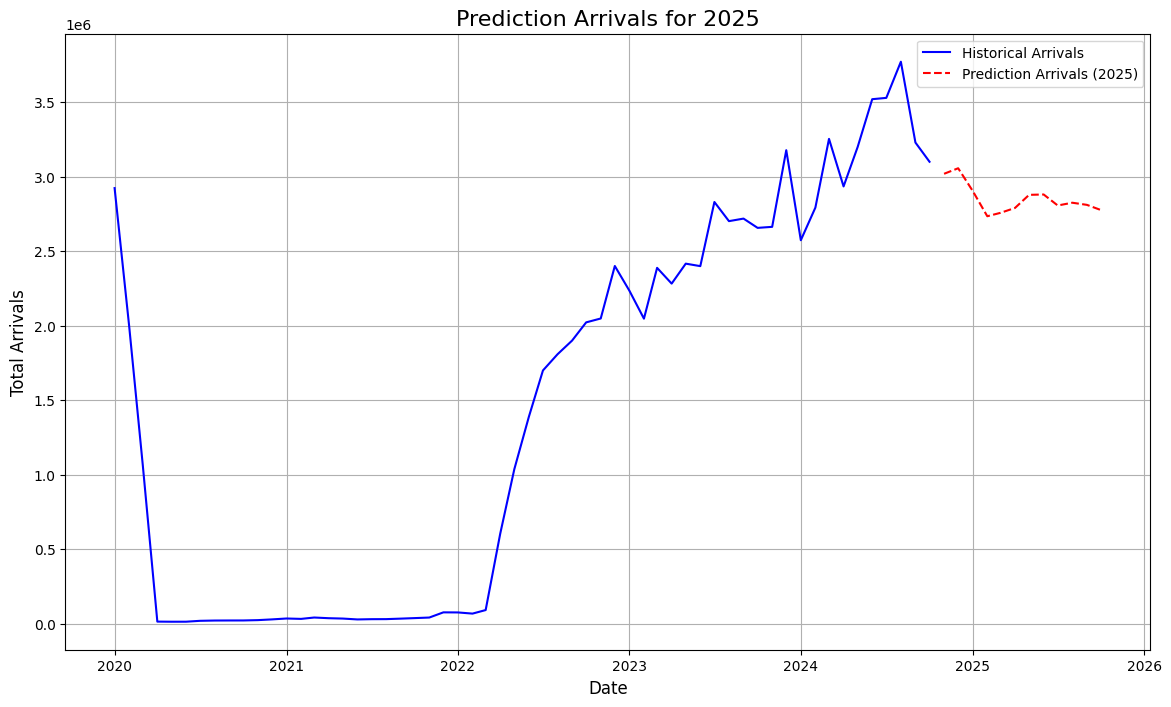

2024-11-01    3.019090e+06
2024-12-01    3.056220e+06
2025-01-01    2.903820e+06
2025-02-01    2.734272e+06
2025-03-01    2.757101e+06
2025-04-01    2.789930e+06
2025-05-01    2.877812e+06
2025-06-01    2.880231e+06
2025-07-01    2.806372e+06
2025-08-01    2.824991e+06
2025-09-01    2.810690e+06
2025-10-01    2.775785e+06
Freq: MS, dtype: float64

In [70]:
arrivals_series = all_arrivals.set_index('date')['arrivals']

model = ExponentialSmoothing(arrivals_series, trend='add', seasonal='add', seasonal_periods=12)
fitted_model = model.fit()

# Forecast arrivals for 2025 (12 months)
forecast_2025 = fitted_model.forecast(steps=12)

forecast_dates = pd.date_range(start=arrivals_series.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
forecast_series = pd.Series(forecast_2025, index=forecast_dates)

# Visualize historical and forecasted arrivals
plt.figure(figsize=(14, 8))
plt.plot(arrivals_series, label='Historical Arrivals', color='blue')
plt.plot(forecast_series, label='Prediction Arrivals (2025)', color='red', linestyle='--')
plt.title('Prediction Arrivals for 2025', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Arrivals', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

forecast_series


The decline in predicted foreigner arrivals for Malaysia in 2025, as shown in the graph, could be attributed to several factors, including:

1.Global Economic Uncertainty: 
- Economic challenges such as recessions, inflation, or currency depreciation in key source countries may reduce outbound travel.

2.Lingering Geopolitical and Policy Issues: 
- Stricter visa regulations, geopolitical tensions, or reduced travel interest from countries like China or European nations could impact foreign arrivals. While Malaysia has eased visa requirements, further liberalization or promotion might be required.

3.Competition with Neighboring Destinations: 
- Countries like Thailand, Vietnam, and Indonesia are aggressively marketing themselves as tourist hubs, which could divert tourists away from Malaysia.

In [71]:
print(train_data.head())


   year  arrivals
0  2020   6172008
1  2021    470559
2  2022  15148512
3  2023  30515304
4  2024  31899166


In [72]:
print(train_data.isnull().sum())


year        0
arrivals    0
dtype: int64


                 arrivals  arrivals_male  arrivals_female      year
arrivals         1.000000       0.999087         0.998617  0.065792
arrivals_male    0.999087       1.000000         0.995459  0.064004
arrivals_female  0.998617       0.995459         1.000000  0.067826
year             0.065792       0.064004         0.067826  1.000000


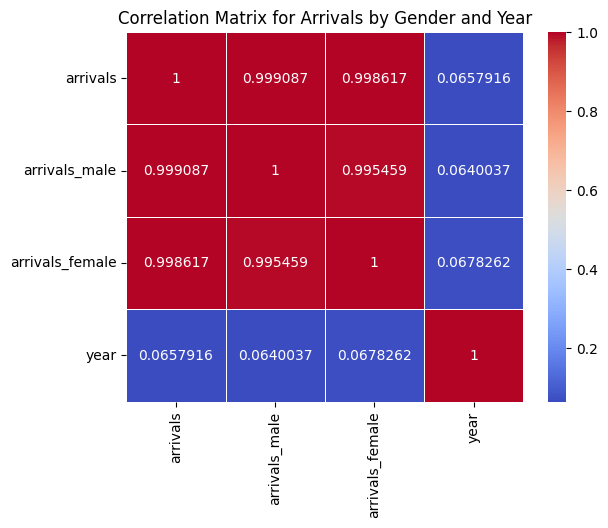

In [73]:
filtered_data = data[['arrivals','arrivals_male', 'arrivals_female', 'year']]

correlation_matrix = filtered_data.corr()

print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='g', linewidths=0.5)
plt.title('Correlation Matrix for Arrivals by Gender and Year')
plt.show()



Correlation

The matrix shows that:
- Male and female arrivals contribute nearly equally to the total arrivals.
- The year has a negligible correlation with arrivals, implying that time does not linearly explain trends in arrivals.


## Model Training

In [74]:
X = filtered_data[['arrivals_male', 'arrivals_female', 'year']]  # Features
y = filtered_data['arrivals']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## K-Nearest Neighbor

In [76]:
knn = KNeighborsRegressor(n_neighbors=5)  # You can experiment with different values for n_neighbors

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

In [77]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print out the results
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 12692978.704674333
Mean Absolute Error: 308.23463601532575


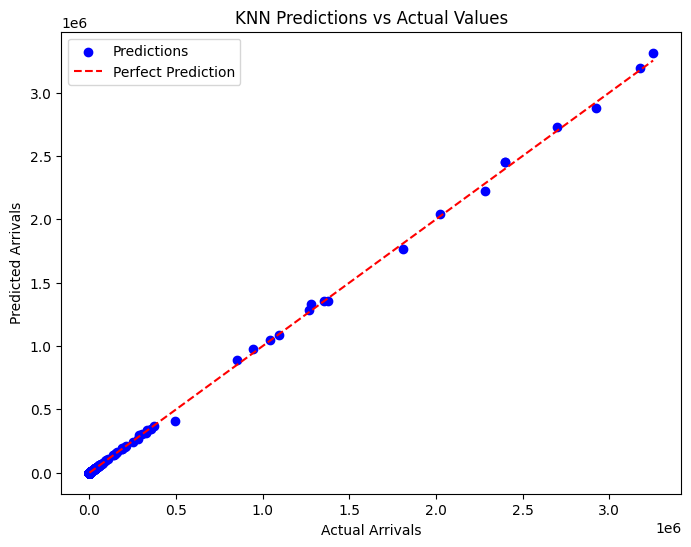

In [78]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('KNN Predictions vs Actual Values')
plt.xlabel('Actual Arrivals')
plt.ylabel('Predicted Arrivals')
plt.legend()
plt.show()

Observations:

1.Alignment:
- The blue points are closely clustered around the red dashed line.
- This indicates that the KNN model performs well, as predictions are generally very close to the actual values.

2.Outliers:
- There are no significant deviations or outliers visible; the predictions remain consistent across the range.

3.Accuracy:
- The close match between predictions and actual values suggests the KNN model demonstrates strong predictive accuracy.


## Decision Tree

In [79]:
dt = DecisionTreeRegressor(random_state=42)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

In [80]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Print out the results for Decision Tree
print(f"Decision Tree - Mean Squared Error: {mse_dt}")
print(f"Decision Tree - Mean Absolute Error: {mae_dt}")

Decision Tree - Mean Squared Error: 18902688.963601533
Decision Tree - Mean Absolute Error: 397.8532567049808


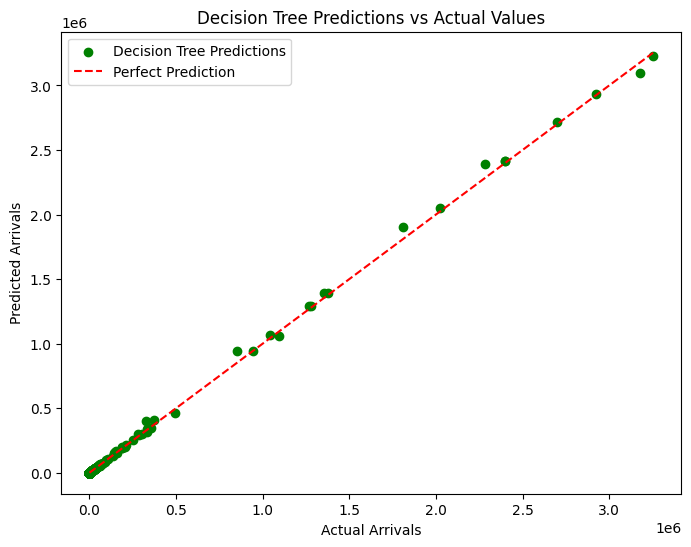

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='green', label='Decision Tree Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Decision Tree Predictions vs Actual Values')
plt.xlabel('Actual Arrivals')
plt.ylabel('Predicted Arrivals')
plt.legend()
plt.show()

Analysis:

1.Alignment: 
- The green dots are closely aligned along the red dashed line, indicating that the decision tree model's predictions are very close to the actual values.
2.Accuracy: 
- The proximity of the predicted values to the actual values suggests that the decision tree is performing well, with high accuracy in its predictions.
3.Range: 
- The plot covers a range of values up to approximately 3 million arrivals, indicating the model's capability to predict across a broad spectrum.

Overall, this visualization indicates a strong performance of the decision tree model in predicting the number of arrivals, with minimal deviation from actual values.


## Random Forest Regressor

In [82]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [83]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - Mean Absolute Error: {mae_rf}")

Random Forest - Mean Squared Error: 6585873.44120333
Random Forest - Mean Absolute Error: 223.05821072796923


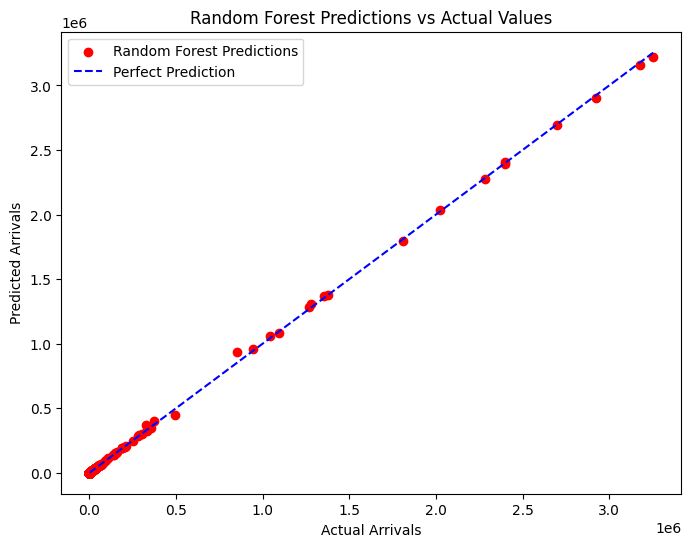

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', label='Perfect Prediction')
plt.title('Random Forest Predictions vs Actual Values')
plt.xlabel('Actual Arrivals')
plt.ylabel('Predicted Arrivals')
plt.legend()
plt.show()

Analysis:

1.Alignment: 
- The red dots are closely clustered around the blue dashed line, suggesting that the random forest model's predictions are very close to the actual values.

2.Accuracy:
- The close alignment of the predicted values to the actual values indicates high accuracy for the random forest model.

3.Range: 
- The plot covers values up to approximately 3 million arrivals, demonstrating the model's effectiveness across a wide range of predictions.

Overall, this visualization signifies that the random forest model performs exceptionally well in predicting the number of arrivals, with minimal discrepancies from the actual values.


### Comparing All Models (KNN, Decision Tree, Random Forest)

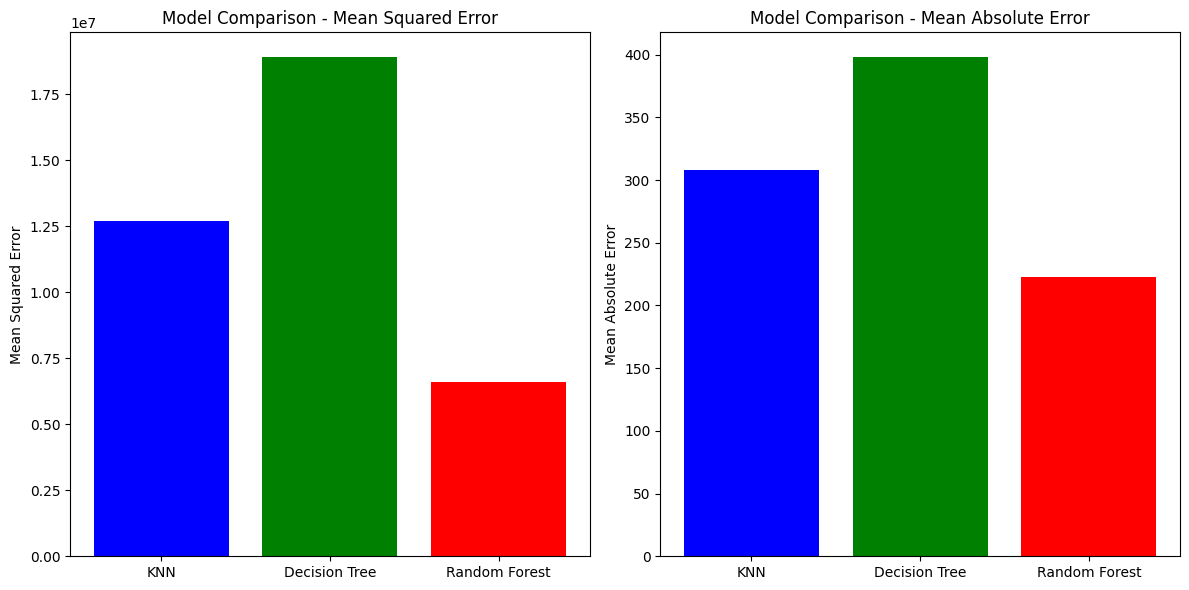

In [85]:
mse_values = [mse, mse_dt, mse_rf]
mae_values = [mae, mae_dt, mae_rf]
models = ['KNN', 'Decision Tree', 'Random Forest']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# MSE comparison
ax1.bar(models, mse_values, color=['blue', 'green', 'red'])
ax1.set_title('Model Comparison - Mean Squared Error')
ax1.set_ylabel('Mean Squared Error')

# mae comparison
ax2.bar(models, mae_values, color=['blue', 'green', 'red'])
ax2.set_title('Model Comparison - Mean Absolute Error')
ax2.set_ylabel('Mean Absolute Error')

plt.tight_layout()
plt.show()


Left Bar Chart: Mean Squared Error

- Y-axis: Mean Squared Error values, scaled in the range of 1e71e71e7 (tens of millions).

- X-axis: Models being compared (KNN, Decision Tree, Random Forest).

Observations:

- KNN (blue): MSE is approximately 1.25×1071.25 \times 10^71.25×107.

- Decision Tree (green): The highest MSE, around 1.9×1071.9 \times 10^71.9×107.

- Random Forest (red): The lowest MSE, just under 7×1067 \times 10^67×106.

Right Bar Chart: Mean Absolute Error

- Y-axis: Mean Absolute Error values (ranging up to 400).

- X-axis: Models (KNN, Decision Tree, Random Forest).

Observations:

- KNN (blue): MAE is slightly above 300.

- Decision Tree (green): The highest MAE, around 400.

- Random Forest (red): The lowest MAE, close to 225.


Summary:

- Random Forest performs the best among the three models, having the lowest error values (both MSE and MAE).
- Decision Tree performs the worst, showing the highest errors across both metrics.
- KNN falls in between the two models.
- This comparison visually highlights Random Forest's superior performance in terms of error reduction.
